print("welcome to BDA Assignment")

### Importing Certain Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading CSV File 

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
type(df['Rating'])

pandas.core.series.Series

In [4]:
df.shape

(10841, 13)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


### Data Cleaning

#### 1) which category apps has highest rating's 
#### 2) which apps has more installs 
#### 3) which apps has more reviews 


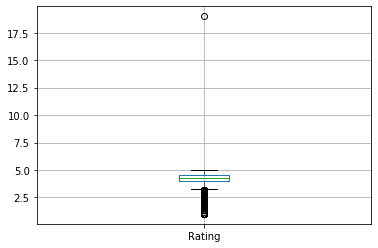

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df.boxplot()
plt.show()

df[df['Rating']>5]

In [10]:
df.drop([10472],inplace=True)

In [11]:
df.iloc[10470:10478]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4,4.0 and up
10478,Sci Fi Sounds,FAMILY,3.2,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1,4.0 and up


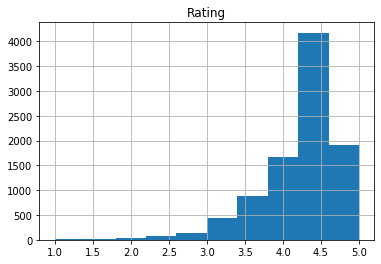

In [12]:
df.hist()
plt.show()

In [13]:
#data cleaning for install:
def getinstalls(address):
    return address.strip('+')


df['Installs'] = df['Installs'].apply(lambda x : getinstalls(x))
df['Installs']=df['Installs'].apply(lambda x :''.join(x.split(',')) )

#---------------------------------------------------------------------------------------------------

# remove columns that are 90 percent empty
# generally here we don't get any problem while conveying the data set 

threshold= len(df)*0.1   #(10% of the rows)
threshold
df.dropna(thresh=threshold,axis=1,inplace=True)


#----------------------------------------------------------------------------------------------------


#data cleaning or manupulation of the price column:

df['Price']=df["Price"].apply(lambda x : x.replace('$','') if "$" in str(x) else str(x))
df['Price']=df["Price"].apply(lambda x : float(x))


#data cleaning or manupulation of the reviews column:

df['Reviews']=pd.to_numeric(df['Reviews'],errors="coerce")

# data cleaning or manuplulation 
# data filling of the rating colmns with the help of mean,median,mode
def manpulate(address):
    return address.fillna(address.median())
    
df["Rating"]=df['Rating'].transform(manpulate)


# data clening and manupulation {filling the NAN values of the rating with the help of mode}
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)




In [14]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df['Installs']=pd.to_numeric(df["Installs"])

In [17]:
results=df.groupby('Category').sum()
results

,Rating,Reviews,Installs,Price
Category,,,,
ART_AND_DESIGN,283.1,1714440,124338100,5.97
AUTO_AND_VEHICLES,357.5,1163666,53130211,13.47
BEAUTY,227.0,396240,27197050,0.00
BOOKS_AND_REFERENCE,1001.5,21959069,1921469576,119.77
BUSINESS,1923.9,13954552,1001914865,185.27
COMICS,249.6,3383276,56086150,0.00
COMMUNICATION,1617.7,815462260,32647276251,83.14
DATING,942.0,7291278,264310807,31.43
EDUCATION,684.6,39595786,871452000,17.96


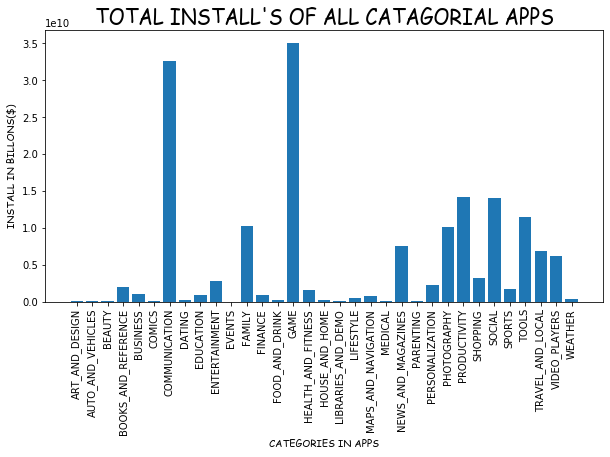

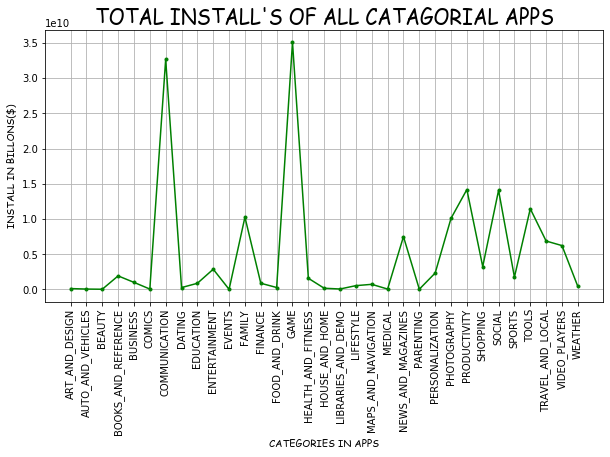

In [18]:
category = [cate for cate,df1 in df.groupby('Category')]

plt.figure(figsize=(10,5))
plt.title(" TOTAL INSTALL'S OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.ylabel('INSTALL IN BILLONS($)',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.bar(category,results['Installs'])
plt.show()



plt.figure(figsize=(10,5))
plt.title(" TOTAL INSTALL'S OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.ylabel('INSTALL IN BILLONS($)',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.grid()
plt.plot(category,results['Installs'],"g.-")
plt.xticks(rotation=90)
plt.show()


#### 1) games carogorial apps are installed highly all over the world

In [19]:
dff= df.sort_values(['Installs'])

In [20]:
dff.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
468,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


#### 2) highly installed top 5 apps accoding to the data set 
      1)Google News
      2)Gmail
      3)Hangout
      4)maps(google)
      5)WhatsApp Messenger


### Task -2

In [21]:
# describe()-------> method
#            -------> [for all numerical values colums cental limit therom aplicable]

df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


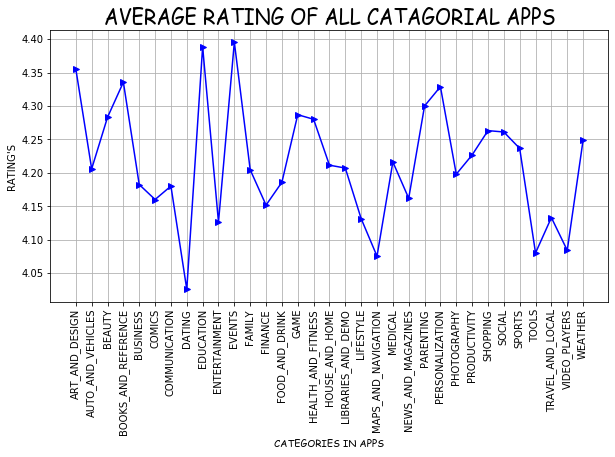

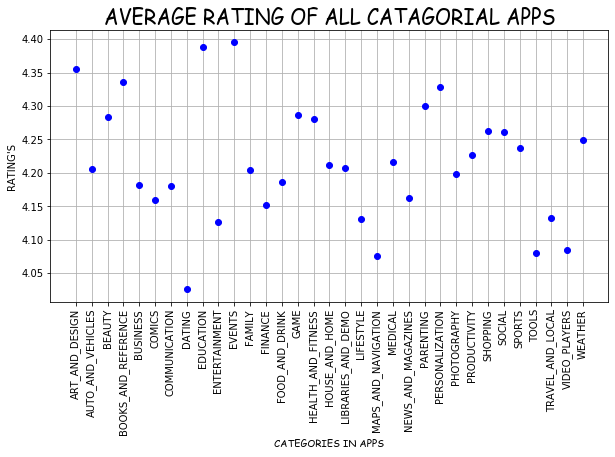

In [22]:
group_df= df.groupby('Category')
a_rating=group_df['Rating'].agg(np.mean)


plt.figure(figsize=(10,5))
plt.title(" AVERAGE RATING OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.ylabel("RATING'S")
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.grid()
plt.plot(category,a_rating,"b>-")
plt.show()

plt.figure(figsize=(10,5))
plt.title(" AVERAGE RATING OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.ylabel("RATING'S")
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.grid()
plt.plot(a_rating,"ro",color='b')
plt.show()

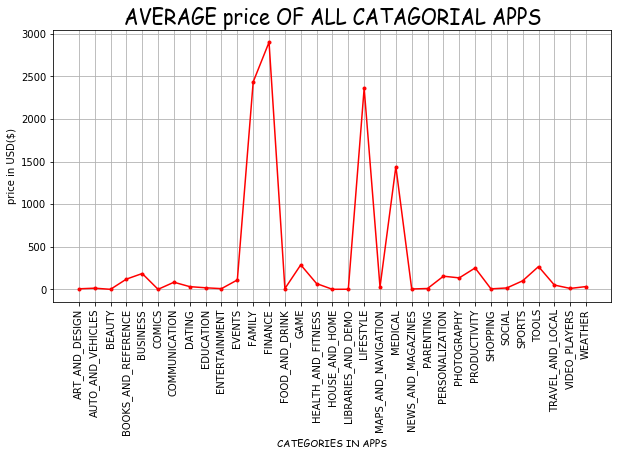

In [23]:
b_price=group_df['Price'].agg(np.sum)
# price ---------> sumation



plt.figure(figsize=(10,5))
plt.title(" AVERAGE price OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.ylabel("price in USD($)")
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.grid()
plt.plot(category,b_price,"r.-")
plt.show()



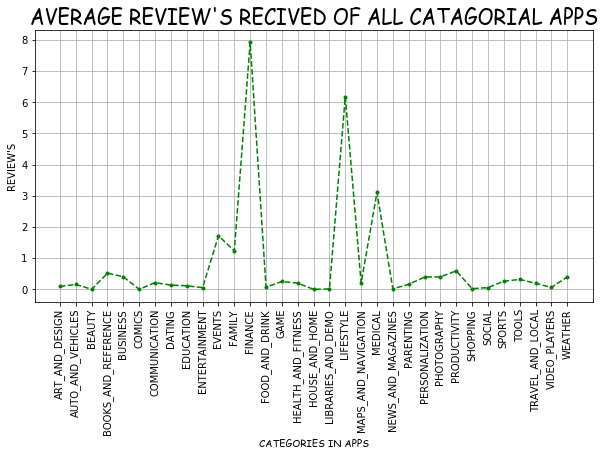

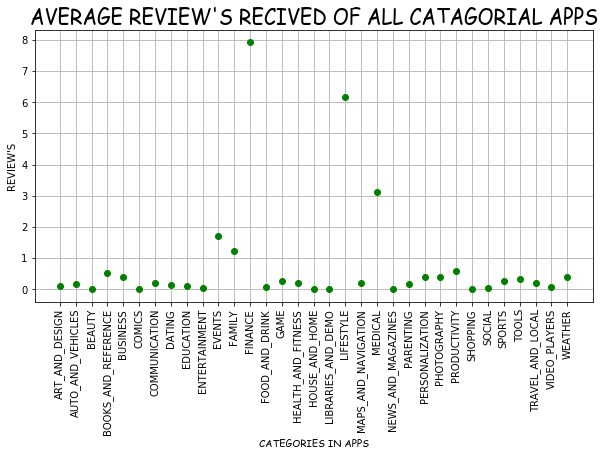

In [24]:
c_review=group_df['Price'].agg(np.mean)
### review------> mean again


plt.figure(figsize=(10,5))
plt.title(" AVERAGE REVIEW'S RECIVED OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.ylabel("REVIEW'S")
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.grid()
plt.plot(category,c_review,"g.--")
plt.show()






plt.figure(figsize=(10,5))
plt.title(" AVERAGE REVIEW'S RECIVED OF ALL CATAGORIAL APPS ",fontdict={"fontname":'Comic Sans MS',"fontsize":20})
plt.ylabel("REVIEW'S")
plt.xlabel('CATEGORIES IN APPS',fontdict={"fontname":'Comic Sans MS',"fontsize":10})
plt.xticks(rotation=90)
plt.grid()
plt.plot(c_review,"ro",color='g')
plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [26]:
from sklearn import preprocessing

df['Type'] = pd.get_dummies(df['Type'])
enc = preprocessing.LabelEncoder()
df['Genres'] = enc.fit_transform(df['Genres'])
df['Content Rating'] = enc.fit_transform(df['Content Rating'])

- Total number of ratings: 10840
- Mean of distribution of rating : 4.206476014760287
- Standard deviation: 0.48031982961731023


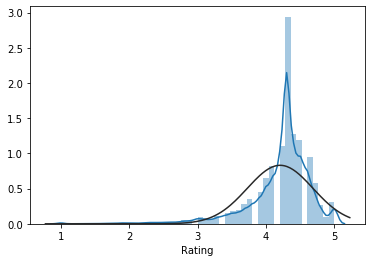

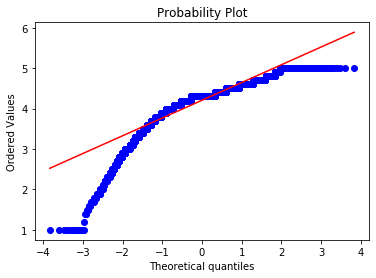

In [27]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['Rating'],fit=norm)
print('- Total number of ratings:', len(df['Rating']))
print('- Mean of distribution of rating :', np.mean(df['Rating']))
print('- Standard deviation:', np.std(df['Rating']))


fig = plt.figure()
prob = stats.probplot(df['Rating'], plot=plt)


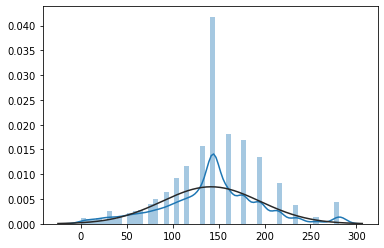

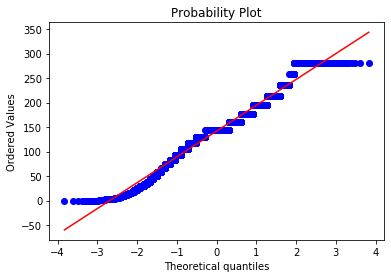

In [28]:
from scipy.stats import boxcox
bcx_target, lam =boxcox(df['Rating'])
sns.distplot(bcx_target,fit=norm);
fig = plt.figure()
prob = stats.probplot(bcx_target, plot=plt)

## predition models starts

### Refer to file 2 for prediction model thank you